# Objective of the analysis


# About

It  innloves dealing with Biomechanical features of orthopedic patients with the aim of grouping the patients 

with various features inoder to find a way to prevent or to correct   disorders of the bones  asscociated with 

muscles and joints

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("column_2C_weka.csv")
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Attributes

pelvic incidence

pelvic tilt

lumbar lordosis angle

sacral slope

pelvic radius

grade of spondylolisthesis

Aim is that as given features(input) predict whether target variable(output) is normal or abnormal

Classification: target variable consists of categories like normal or abnormal


In [6]:
#checking  the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


The lenght of the data is 310

all the features are  floats

 the target varaibles are  object

In [7]:
#more of data using the statistics  summary
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


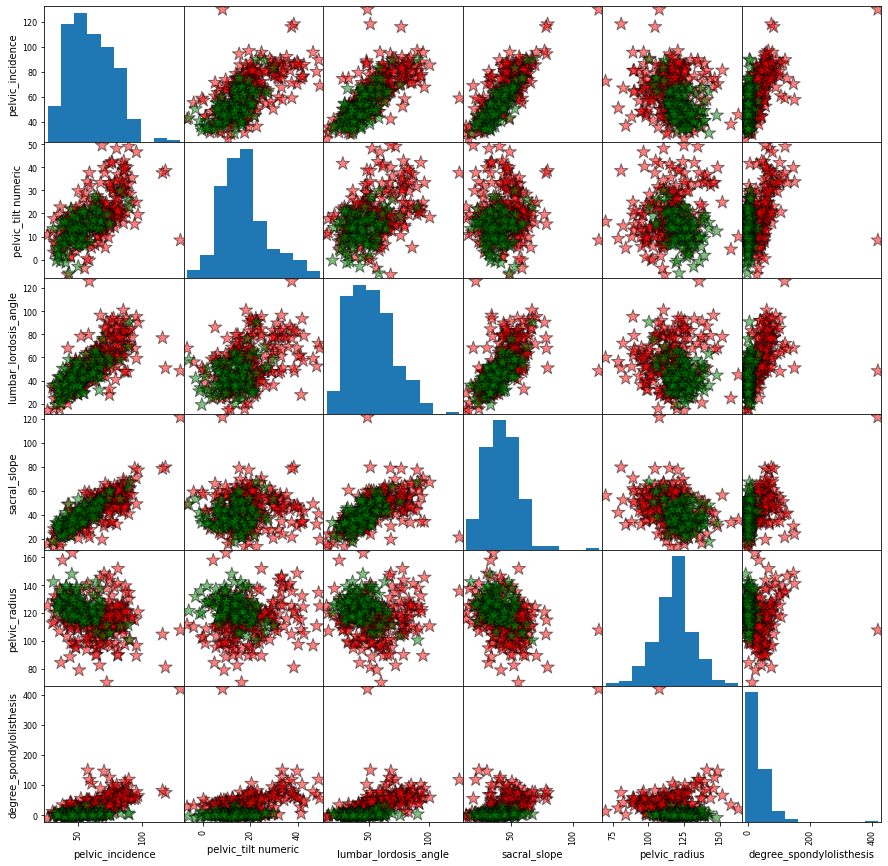

In [29]:

color_list = ['red' if i=='Abnormal' else 'green' for i in df.loc[:,'class']]



pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

In [33]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

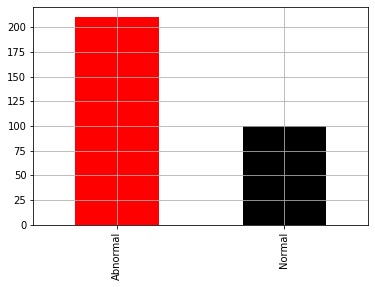

In [38]:
df['class'].value_counts().plot(kind='bar',color=["red",'black'])
plt.title("Distibution of the ")
plt.grid()

In [45]:
x=df.iloc[:,:-1]
x.head(2)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259


In [46]:
y=df.iloc[:,-1]
y.head(2)

0    Abnormal
1    Abnormal
Name: class, dtype: object

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size=0.3,random_state =1) 

In [55]:
#K-NEAREST NEIGHBORS (KNN)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
prediction
# print(format(prediction))

array(['Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abno

In [57]:
model.score(x_test,y_test)*100

86.02150537634408

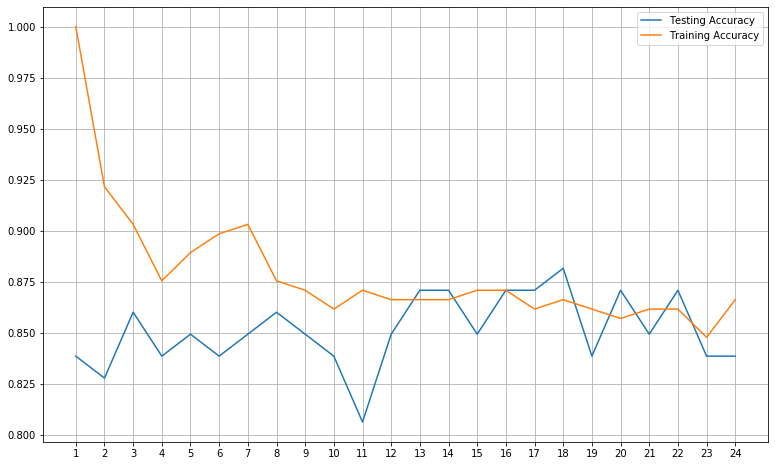

In [77]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []


for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.grid()
plt.savefig("the graph of ")
plt.xticks(neig)
plt.show()



The highest  value of k in the testing is 18 hence is gives the max number of k

Text(0.5, 1.0, 'Distribution of sacral_slope  against pelvic_incidence ')

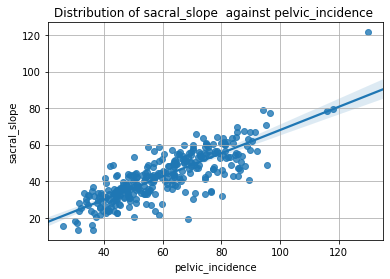

In [105]:
X=df['pelvic_incidence']
Y=df['sacral_slope']
sns.regplot(X,Y)
plt.grid()
plt.title("Distribution of sacral_slope  against pelvic_incidence ")

In [118]:
#checking the accurancy of the model
from sklearn.model_selection  import cross_val_score
score=cross_val_score(model,x_train,y_train)
score


array([0.82191781, 0.86111111, 0.81944444])

In [117]:
np.sum(score)/3

0.8341577879249112

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
rf=RandomForestClassifier(random_state=4)
rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [123]:
y_predict=rf.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
cm


array([[58,  8],
       [ 7, 20]])

In [129]:

p=classification_report(y_test,y_predict)
p

'              precision    recall  f1-score   support\n\n    Abnormal       0.89      0.88      0.89        66\n      Normal       0.71      0.74      0.73        27\n\n    accuracy                           0.84        93\n   macro avg       0.80      0.81      0.81        93\nweighted avg       0.84      0.84      0.84        93\n'

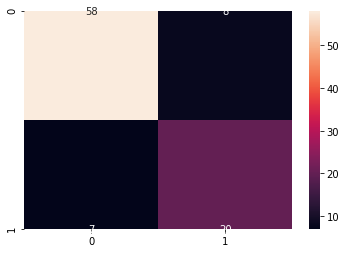

In [132]:
#visualization of cm using the heatmap
sns.heatmap(cm,annot=True)

In [138]:
#encoding the categorical data
new_data=pd.get_dummies(df)
new_data.head(2)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0


In [139]:
new_data.drop('class_Normal',axis=1,inplace=True)

In [140]:
new_data.head(4)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1


# Unsupervised learning

In [147]:

df.head(2)


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259


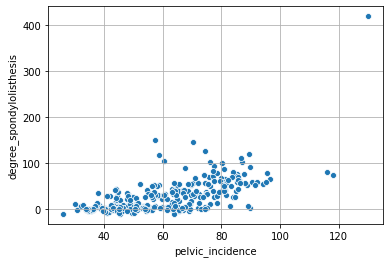

In [149]:
sns.scatterplot(df['pelvic_incidence'],df['degree_spondylolisthesis'])
plt.grid()

In [156]:
data2=df.loc[:,['pelvic_incidence','degree_spondylolisthesis']]
data2.head(2)


,pelvic_incidence,degree_spondylolisthesis
0,63.027818,-0.254400
1,39.056951,4.564259


In [164]:
from sklearn.cluster import KMeans 
km=KMeans (n_clusters=2)
km.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

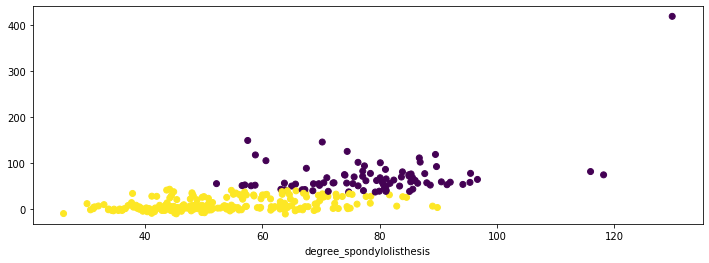

In [165]:
labels=km.predict(data2)
plt.figure(figsize=(12,4))
plt.scatter(data2['pelvic_incidence'],data2['degree_spondylolisthesis'],c=labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [169]:
df=pd.read_csv("column_2C_weka.csv")
df.head(2)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal


In [171]:
#cross-tabualtion table
df1=pd.DataFrame({'labels':labels,'class':df['class']})
ct=pd.crosstab(df1['labels'],df1['class'])
ct

class,Abnormal,Normal
labels,,
0,86,0
1,124,100


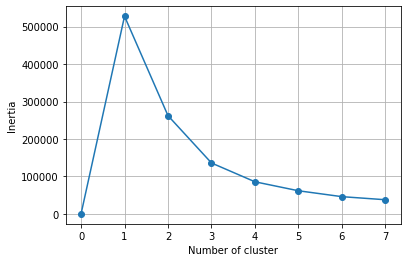

In [174]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.grid()
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()
